#**Week 9 - Case Study on ANOVA**



> _XYZ Company has offices in four different zones. The company wishes to investigate the following:_

*  **The Mean sales generated by each zone.**
*  **Total sales generated by all the zones for each month.**
*  **Check whether all the zones generate the same amount of sales.**

_Help the company to carry out their study with the help of data provided._



######***Importing necessary libraries***

In [1]:
pip install scipy --upgrade

     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


######***Reading dataset Sales_data_zone_wise.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


######***Finding the no: of Observations***

In [6]:
df.shape

(29, 5)

######***Checking for null values***

In [7]:
df[df.isna().any(axis=1)]

,Month,Zone - A,Zone - B,Zone - C,Zone - D


##**Insights:**


*   The dataset contains the details of the sales recorded in each month, by each zones of the company, such as - Zone - A, Zone - B, Zone - C, Zone - D.
*   **29 Observations** and **5 Features** are found.
*   **No Null** values are recorded.
*  The datatype for the feature - 
      *   _Month is given as Object_
      *   _Zone - A, Zone - B, Zone - C, Zone - D are given as Integers with 64-bits_

######***Density Plot for the features - Zone - A, Zone - B, Zone - C, Zone - D***

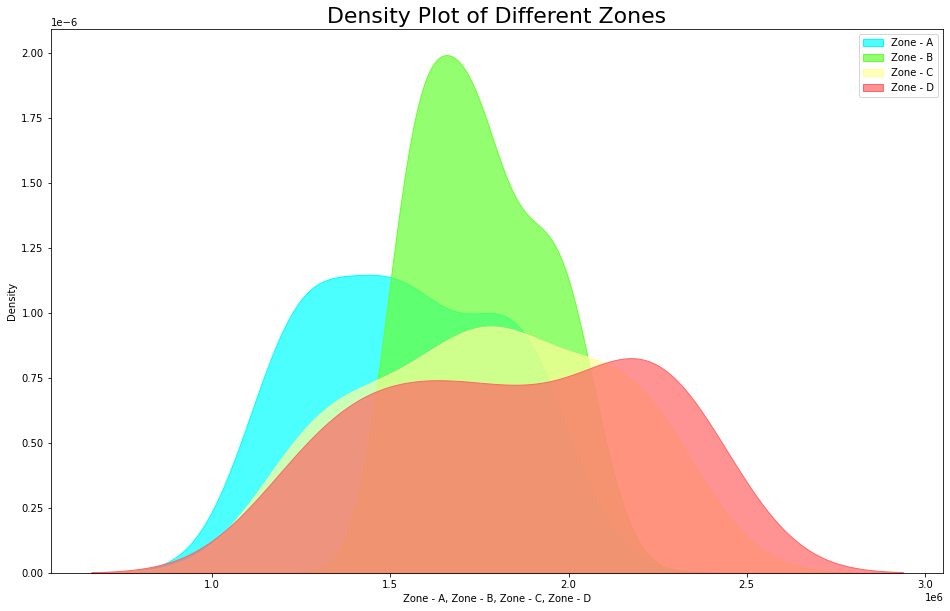

In [8]:
plt.figure(figsize=(16,10))
sns.kdeplot(df['Zone - A'], shade=True, color="#00ffff", label="Zone - A", alpha=.7)
sns.kdeplot(df['Zone - B'], shade=True, color="#66ff33", label="Zone - B", alpha=.7)
sns.kdeplot(df['Zone - C'], shade=True, color="#ffff99", label="Zone - C", alpha=.7)
sns.kdeplot(df['Zone - D'], shade=True, color="#ff6666", label="Zone - D", alpha=.7)

plt.title('Density Plot of Different Zones', fontsize=22)
plt.xlabel('Zone - A, Zone - B, Zone - C, Zone - D')
plt.legend()
plt.show()

##**Insights:**
_As visible from the plot, the density is high for Zone - B_

##**The Mean sales generated by each zone**

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00000,29.00000,29.00000,29.00000
mean,1540493.13793,1755559.58621,1772871.03448,1842926.75862
std,261940.06187,168389.88590,333193.72453,375016.47949
min,1128185.00000,1527574.00000,1237722.00000,1234311.00000
25%,1305972.00000,1606010.00000,1523308.00000,1520406.00000
50%,1534390.00000,1740365.00000,1767047.00000,1854412.00000
75%,1820196.00000,1875658.00000,2098463.00000,2180416.00000
max,2004480.00000,2091194.00000,2290580.00000,2364132.00000


##**Insights:**
_The following are the observed means for each Zones:_
*   Zone - A : 1540493.13793
*   Zone - B : 1755559.58621
*   Zone - C : 1772871.03448
*   Zone - D : 1842926.75862

_It is clear that, the **means are not equal** for all the Zones_





##**Total sales generated by all the zones for each month**

In [10]:
new_df=df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1).to_frame()
new_df.columns = ['Total Sales']
new_df['Month']=df['Month']
new_df

,Total Sales,Month
0,7022544,Month - 1
1,7152303,Month - 2
2,6475939,Month - 3
3,8174449,Month - 4
4,5995328,Month - 5
5,7151387,Month - 6
6,7287108,Month - 7
7,7816299,Month - 8
8,6703395,Month - 9
9,7128210,Month - 10


##**Insights:**
_The above listed are the total sales generated by all the zones for each month_

##**Check whether all the zones generate the same amount of sales.**

***Define Hypothesis***
  
_If all the zones generate the same amount of sales, definitely their mean will be same_


*   The Null Hypothesis, ***H(0) - The Means are equal***
*   The Alternative Hypothesis, ***H(a) - At least, one group mean is different from other groups***
*   Significance level = 5%
*   Here, we are doing **One-way ANOVA Test**




***Determining F-critical Value***

_To be able to determine F-critical value, we need:_

*   Significance level
*   df1 = k-1 (dfn — degrees of freedom nominator)
*   df2 = N-k (dfd — degrees of freedom denominator)

_where k = number of the groups, N = number of total observations._




In [15]:
from scipy.stats import f 
dfn = 3 #(4-1)
dfd = 112 #(4*29-4)
f_crit = f.ppf(1-0.05,dfn,dfd)
print('F-critical=',f_crit)

F-critical= 2.6856434512366034


***Finding F-statistics and P-value***

In [12]:
fvalue, pvalue = stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D'])
print('F-Statistic=',fvalue,'\nP-value=',pvalue)
if(pvalue<=0.05):
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

F-Statistic= 5.672056106843581 
P-value= 0.0011827601694503335
We reject null hypothesis


##**Insights:**


*  _Since the **P-Value is smaller than the level of significance** , we reject our Null Hypothesis._
*   _Also, **the F-statistics is greater than the F-ciritical**, leads to the rejection of our Null Hypothesis._
*  _Thus, we conclude that - **At least, one group mean is different from other groups** OR **All the zones do not generate the same amount of sales**_